# Ajay Kumar
# B190490CS
## Machine Learning Assignment - II
### MNIST Dataset

In [21]:
import numpy as nmp
import pathlib
import matplotlib.pyplot as plt

# importig the Dataset from the zipped file
def get_mnist(x,y):
    with nmp.load(f"/home/Ajaypc/Dowload/ML/mnist.npz") as f:
        images, labels = f[x], f[y]
    images = images.astype("float32") / 255
    images = nmp.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = nmp.eye(10)[labels]
    return images, labels

In [38]:
images, labels = get_mnist("x_train","y_train")
w_i_h = nmp.random.uniform(-0.5, 0.5, (20, 784))
w_h_o = nmp.random.uniform(-0.5, 0.5, (10, 20))
b_i_h = nmp.zeros((20, 1))
b_h_o = nmp.zeros((10, 1))

In [39]:

"""
w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer
"""

learn_rate = 0.01
nr_correct = 0
iter = 3
for epoch in range(iter):
    for image, l in zip(images, labels):
        image.shape += (1,)
        l.shape += (1,)
        # Forward propagation input -> hidden
        h_pre = b_i_h + w_i_h @ image
        h = 1 / (1 + nmp.exp(-h_pre))
        # Forward propagation hidden -> output
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + nmp.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * nmp.sum((o - l) ** 2, axis=0)
        nr_correct += int(nmp.argmax(o) == nmp.argmax(l))

        # Backpropagation output -> hidden (cost function derivative)
        delta_o = o - l
        w_h_o += -learn_rate * delta_o @ nmp.transpose(h)
        b_h_o += -learn_rate * delta_o
        # Backpropagation hidden -> input (activation function derivative)
        delta_h = nmp.transpose(w_h_o) @ delta_o * (h * (1 - h))
        w_i_h += -learn_rate * delta_h @ nmp.transpose(image)
        b_i_h += -learn_rate * delta_h

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

num = 10
res = []
for i in range(num):
    res.append(nmp.random.randint(0,59999))


Acc: 85.87%
Acc: 92.47%
Acc: 93.56%


In [24]:
def image_show(index):
    im= images[index]
    plt.imshow(im.reshape(28, 28))
    im.shape += (1,)
    h_pre = b_i_h + w_i_h @ im.reshape(784, 1)
    h = 1 / (1 + nmp.exp(-h_pre))
    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + nmp.exp(-o_pre))
    plt.title(f"Predicted output is  {o.argmax()} :)")
    plt.show()

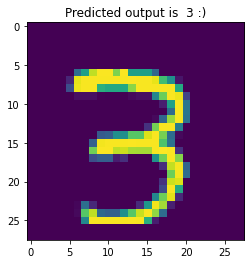

In [25]:
image_show(res[0])

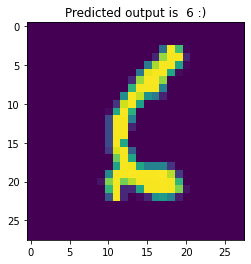

In [26]:
image_show(res[1])

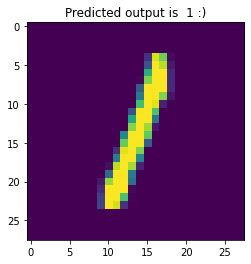

In [27]:
image_show(res[2])

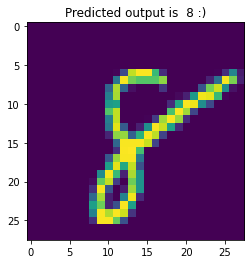

In [28]:
image_show(res[3])

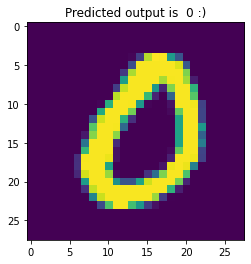

In [29]:
image_show(res[4])

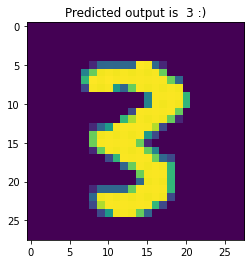

In [30]:
image_show(res[5])

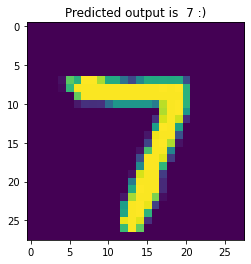

In [31]:
image_show(res[6])

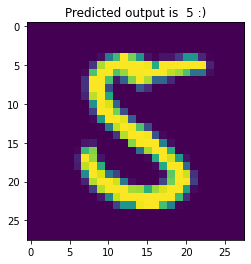

In [32]:
image_show(res[7])

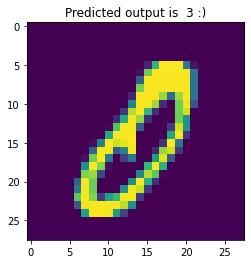

In [33]:
image_show(res[8])

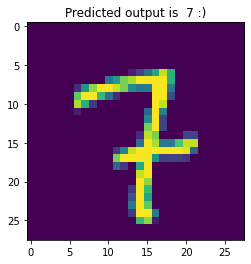

In [34]:
image_show(res[9])

In [40]:
test_images,test_labels = get_mnist("x_test","y_test")
test_images.shape

(10000, 784)

In [41]:
test_labels.shape

(10000, 10)

In [42]:
pred = 0
for index in range(0,test_images.shape[0]):
    img = test_images[index]
    l = test_labels[index]
    img.shape += (1,)
    l.shape += (1,)
    h_pre = b_i_h + w_i_h @ img.reshape(784, 1)
    h = 1 / (1 + nmp.exp(-h_pre))
    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + nmp.exp(-o_pre))
    if(nmp.argmax(o) == nmp.argmax(l)):
        pred = pred + 1
print(f"Acc: {round((pred / test_images.shape[0]) * 100, 2)}%")

Acc: 93.11%
